<a href="https://colab.research.google.com/github/analluvias/sinais_elementares/blob/master/C%C3%B3pia_de_Sinais_elementares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
    
<h1 style="color:Blue;"> <center> <ins> <b>
SINAIS E SISTEMAS
</b> </ins> </center> </h1>
    
<h3 style="color:Blue;"> <center> <b>
Sinais Elementares em Python
</b></center> </h3>
    
</div>

---

__Objetivo:__ esse guia de atividades tem como objetivo principal o treinamento do aluno na geração de gráficos que representem os principais sinais elementares usados em processamento de sinais, a partir do entendimento das funções pré-implementadas encontradas nas bibliotecas `numpy`, `scipy`(em especial o submódulo `signal`) e `matplotlib` do Python (importadas a seguir). Para isso, o guia apresenta uma discussão sobre geração de sinais usando essas bibliotecas, na sessão 1, e, em seguida, na sessão 2, são apresentadas e discutidas as definições e as implementações de 11 tipos diferentes de sinais elementares. Além disso, um conjunto de exercícios práticos é distribuído ao longo do texto para que o aluno possa praticar, de forma crítica, o conteúdo disposto aqui. Todos os exercícios são marcados com uma barra
 > __Exercício i:__

 ---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
%matplotlib inline

<div class="alert alert-block alert-info" style="color:Blue;">
1. Geração de gráficos de sinais
</div>

Para gerar o gráfico de qualquer sinal, contínuo ou discreto, precisamos, antes de tudo, definir um vetor, que representará a variável independente da função, para servir de argumento para que encontremos os valores que desejamos para gerar a curva.

No `numpy`, temos duas formas de fazer isso, usando as funções `arange` e `linspace`. As duas se diferenciam por:

* `arange(início, fim, passo)`: gera um vetor entre os valores inicial e final, com passo (diferença entre valores consecutivos) explicitamente estabelecido;
* `linspace(início, fim, nº de pontos)`: gera um vetor entre os valores inicial e final, com número de pontos explicitamente definido.

Por exemplo:

In [ ]:
np.arange(1,10,0.5)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ,
       7.5, 8. , 8.5, 9. , 9.5])

In [ ]:
np.linspace(1,10, 20)

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

Para mais informações, procure a documentação.

Como estamos interessados primeiramente em sinais no domínio do tempo, isto é, que podemos ver ao longo de uma janela temporal, então nosso interesse está em gerar um vetor que represente a janela de tempo na qual se quer visualizar o sinal desejado.

Antes de tudo, temos de ter em mente que, mesmo que estejamos objetivando gerar sinais contínuos, nenhum computador fará isso de forma real. Isso porque computadores somente operam com valores discretos, sendo, portanto, para as arquiteturas atuais, impossível simular com realismo funções contínuas.

Então, como gerar gráficos de funções contínuas em um computador?

Basicamente, o que as bibliotecas de geração de gráficos fazem (no nosso caso, a biblioteca `matplotlib`) é calcular o valor da função para cada ponto do vetor de entrada gerado (variáveis independentes) e _interpolar_ os valores entre esses pontos, isto é, literalmente _ligar os pontinhos_.

Vejamos um exemplo básico. Vamos gerar o gráfico da função $y = x(t) = t^2$. Para isso, vamos, antes de tudo, gerar nosso vetor $t$, representando o intervalo de tempo no qual queremos ver o sinal. Vamos usar a função `linspace`, mas poderíamos usar também a `arange`.

In [ ]:
t = np.linspace(-2,2,10)
t

array([-2.        , -1.55555556, -1.11111111, -0.66666667, -0.22222222,
        0.22222222,  0.66666667,  1.11111111,  1.55555556,  2.        ])

Como podemos ver, o vetor tempo é um conjunto de valores variando entre $-2$ e $2$. Como a função `arange` gera valores no intervalo [início, fim], isto é, incluindo o valor inicial e o final.

Vamos então escrever, então, a função $x(t)$ e calcular seus valores para os pontos do vetor $t$.

In [ ]:
def x(t): return t**2

In [ ]:
y = x(t)
y

array([4.        , 2.41975309, 1.2345679 , 0.44444444, 0.04938272,
       0.04938272, 0.44444444, 1.2345679 , 2.41975309, 4.        ])

Como podemos observar, o vetor $y$, saída da função $x(t)$, é, novamente, um vetor, com mesmo número de elementos de $t$, em que cada elemento é resultado da aplicação da função a cada ponto de $t$. É importante destacar aqui uma das características mais importantes da biblioteca `numpy`: a capacidade de vetorização, que permite que todas as operações envolvendo vetores e matrizes se façam elemento a elemento, sem a necessidade de criar um laço explícito para isso.

Podemos agora gerar o gráfico da função $x(t)$ usando a função `plot` da biblioteca `matplotlib`.

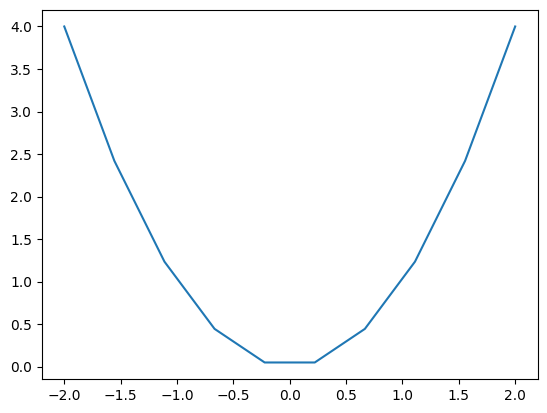

In [ ]:
plt.plot(t,y)

Como vemos, o gráfico mostrado é de uma função contínua, apesar da entrada e saída da função serem vetores com valores discretos. Os intervalos entre esses pontos foram "completados", conforme discutimos acima. É possível ver um certo "serrilhado" na parte de baixo do gráfico.

Também é importante destacar que quanto mais pontos o vetor $t$ tiver, maior será a resolução do gráfico, ou seja, mais "próximo do contínuo" ele será. Obviamente, quanto mais pontos colocarmos, principalmente para funções mais complexas, mais demorado será o processamento da função, acarretando em custo computacional.

Por exemplo, se refizermos o gráfico considerando

In [ ]:
t = np.linspace(-2,2,40000)
y = x(t)
len(y)

40000

obtemos vetores com $40$ mil pontos e, a curva, ficará da seguinte forma

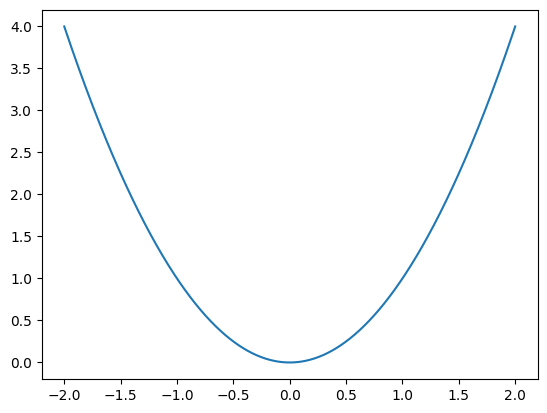

In [ ]:
plt.plot(t,y)

Numa rápida inspeção visual,é possível ver que a resolução do gráfico é bastante superior.

> __Exercício 1:__ Usando o exemplo acima, demonstre que o impacto da quantidade de pontos para a geração de gráficos no tempo de processamento e  na resolução do gráfico gerado. Dica: use o comando %timeit no jupyter.


In [ ]:
import timeit

def func_10():

  y = x(t)


result = timeit.timeit('func_10', globals=globals())
print(result)

def func_4000():

  t = np.linspace(-2,2,40000)
  y = x(t)


result = timeit.timeit('func_4000', globals=globals())
print(result)


0.07711155699996652
0.07567189500002769


Então, como gerar gráficos de funções discretas, se a função `plot` interpola os pontos gerados? Faremos uso da função `stem`, também do `matplotlib`.

Para a mesma função mostrada acima, o gráfico ficaria da seguinte forma

In [ ]:
t = np.arange(-2,2.2,.2)

In [ ]:
y = x(t)

<StemContainer object of 3 artists>

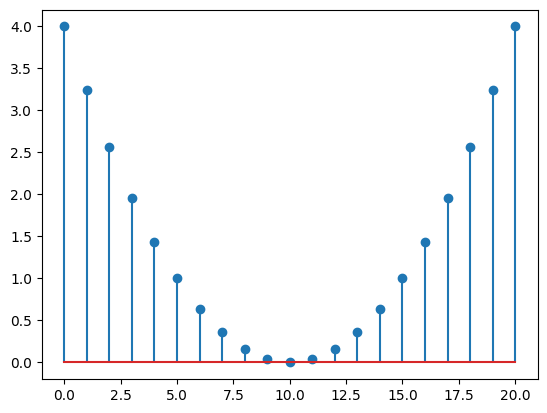

In [ ]:
plt.stem(y)

A função `arange` foi usada aqui para facilitar a visualização, tendo em vista que o período de amostragem (o intervalo de tempo entre dois valores consecutivos) é justamente o passo ajustado na função.

Isso não impede, porém, o uso da função `linspace`, mas o raciocínio seria outro.

A função `stem` tem dois parâmetros de entrada: os valores do eixo-x (no nosso caso, de $t$) e os valores do eixo-y, sendo este obrigatório. Os valores do eixo-x, quando não especificados, são adotados como igualmente distribuído para os valores do eixo-y.

A função retorna uma tupla com três elementos: `markerline`, que são os marcadores (as bolinhas), `stemlines`, que são as linhas ligadas aos marcadores e a `baseline`, que é a linha de base (que no gráfico aparece vermelha).

Para mais informações, ver a documentação.

<div class="alert alert-block alert-info" style="color:Blue;">
2. Sinais Elementares
</div>


#### __Seno/Cosseno__

$$
x(t) = A\text{cos}(\omega t + \theta)
$$

em que $A$ é amplitude do sinal, $\theta$ é a fase do sinal e $\omega$ é sua frequência ângular, definida como $\omega = 2\pi f$, sendo $f$ a frequência absoluta do sinal.

Por que $2\pi$? Por que o período de qualquer forma de onda está relacionada diretamente com o movimento circular, como ilustra a imagem abaixo.

![](Sine_curve_drawing_animation.gif)

Como o período do sinal é dado por

$$ T = \frac{1}{f},$$

então, para o sinal senoidal, podemos escrever que

$$T = \frac{2\pi}{\omega}.$$

Para gerar o gráfico, fazemos uso da função `sin` ou `cos` da `Numpy`:

In [ ]:
t = np.linspace(-5,5,200)
y = np.cos(2*t)

Assim, para um sinal senoidal contínuo, temos

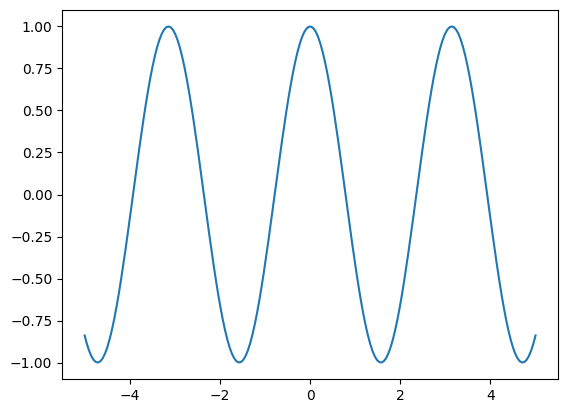

In [ ]:
plt.plot(t,y)

E para o sinal senoidal discreto, temos

In [ ]:
t = np.arange(-5,5,.2)
y = np.cos(2*t)

<StemContainer object of 3 artists>

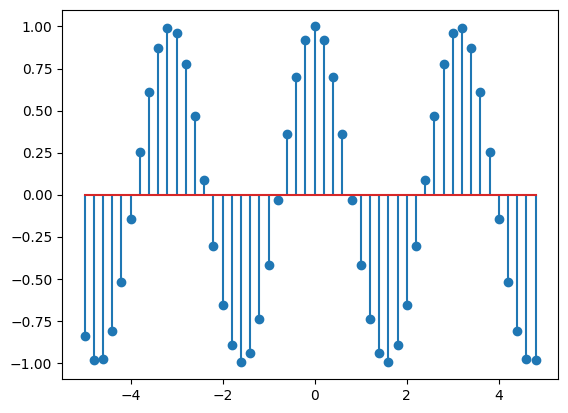

In [ ]:
plt.stem(t,y)

#### __Sinal exponencial complexo__

O sinal exponencial complexo é definido pela função

\begin{equation}
x(t) = e^{s t}
\end{equation}

em que $s = \sigma + j \omega$, relacionada com a frequência do sinal complexo, sendo $\sigma, \omega \in \mathbb{R}$. Esse sinal é freqüentemente usado como uma representação generalizada de sinais harmônicos (análise de Fourier).

Usando a fórmula de Euler (ver nota na sala de aula virtual do moodle da disciplina), podemos reescrever a função acima como

\begin{equation}
x(t) = e^{(\sigma + j \omega) t} = e^{\sigma t} \cos(\omega t) + j e^{\sigma t} \sin(\omega t)
\end{equation}

As partes real e imaginária do sinal é dada por um seno/cosseno ponderado, com frequência angular $\omega = 2 \pi f$ (como descrito na sessão 2.1 dessa nota).

Para $t>0$, o elemento de ponderação dependente do tempo, $e^{\sigma t}$, é responsável pelo formato final do sinal. Assim, o sinal será:

* de amplitude máxima constante, quando $\sigma = 0$,

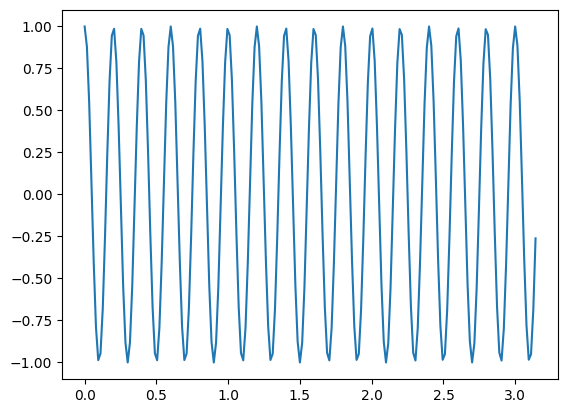

In [ ]:
t = np.linspace(0,np.pi,200)
f = 5
sigma = 0
omega = 2*np.pi*f
s = sigma + 1j*omega
y = np.exp(s*t)
# plt.plot(t,y)
plt.plot(t,np.real(y))


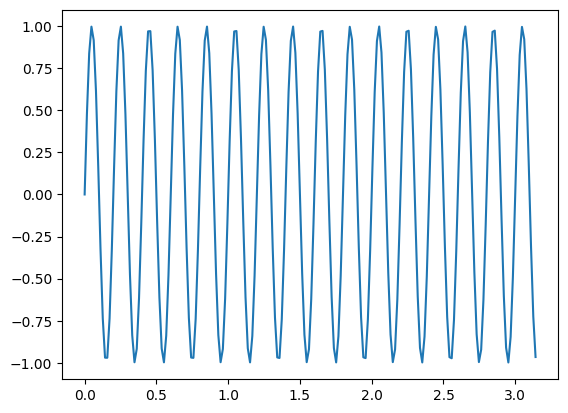

In [ ]:
plt.plot(t,np.imag(y))

* de amplitude com crescimento exponencial, quando $\sigma > 0$,

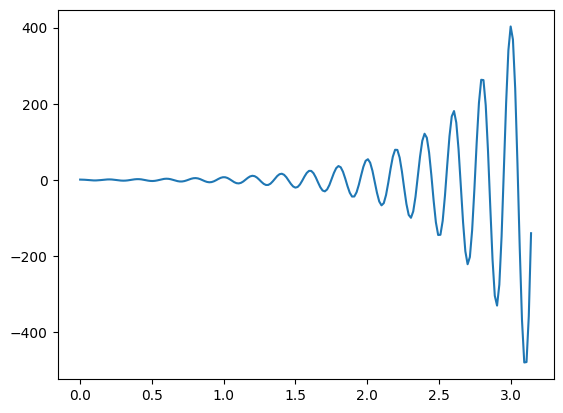

In [ ]:
t = np.linspace(0,np.pi,200)
f = 5
sigma = 2
omega = 2*np.pi*f
s = sigma + 1j*omega
y = np.exp(s*t)
plt.plot(t,y)

* de amplitude com decaimento exponencial, quando $\sigma < 0$,

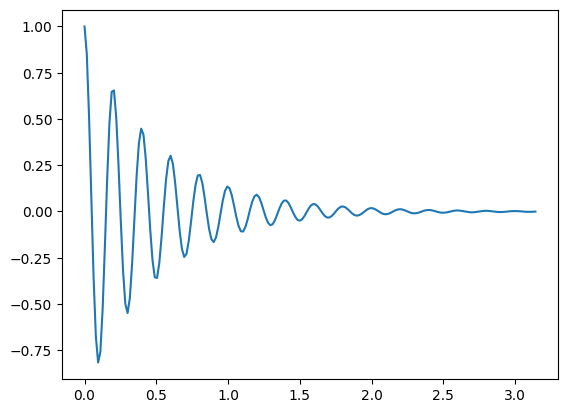

In [ ]:
t = np.linspace(0,np.pi,200)
f = 5
sigma = -2
omega = 2*np.pi*f
s = sigma + 1j*omega
y = np.exp(s*t)
plt.plot(t,y)

> __Exercício 2:__ Nos gráficos acima, todos foram gerados no intervalo $[0,\pi]$. O comportamento das curvas muda para o intervalo  $[-\pi, 0]$? E para valores além de $\pi$? Explique os resultados.


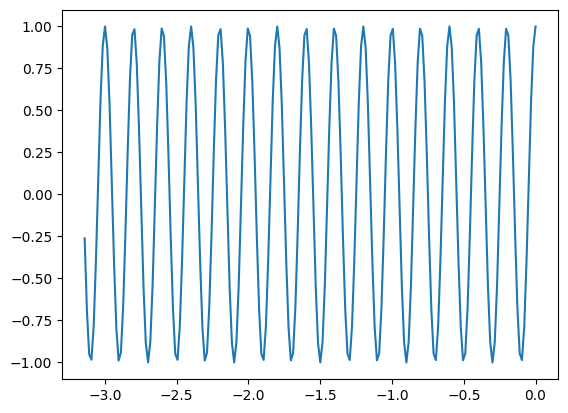

In [ ]:
 # σ=0

t = np.linspace(-np.pi,0,200)
f = 5
sigma = 0
omega = 2*np.pi*f
s = sigma + 1j*omega
y = np.exp(s*t)
plt.plot(t,y)

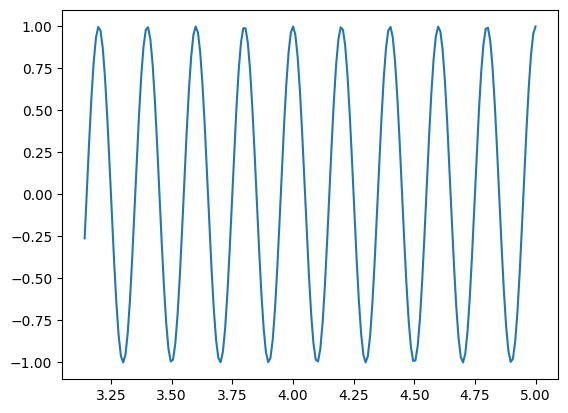

In [ ]:
 # σ=0

t = np.linspace(np.pi,5,200)
f = 5
sigma = 0
omega = 2*np.pi*f
s = sigma + 1j*omega
y = np.exp(s*t)
plt.plot(t,y)

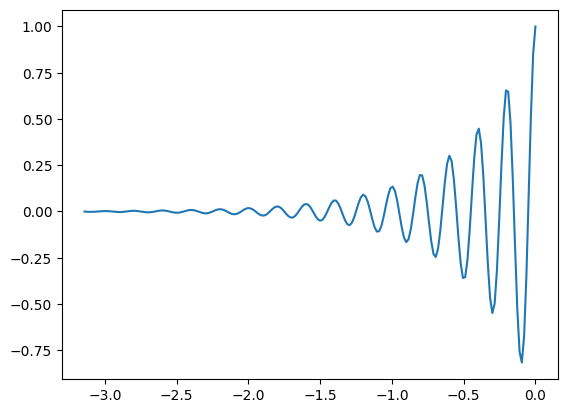

In [ ]:
 # σ > 0
t = np.linspace(-np.pi,0,200)
f = 5
sigma = 2
omega = 2*np.pi*f
s = sigma + 1j*omega
y = np.exp(s*t)
plt.plot(t,y)

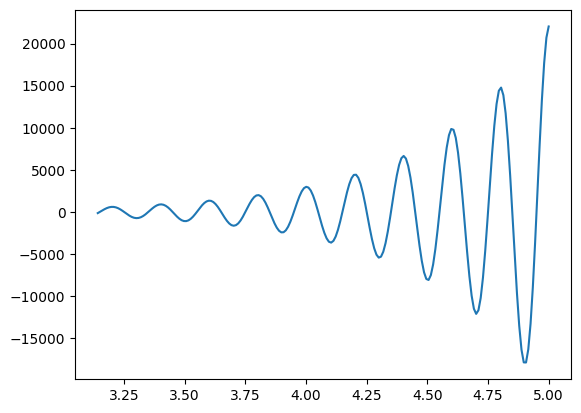

In [ ]:
 # σ > 0
t = np.linspace(np.pi,5,200)
f = 5
sigma = 2
omega = 2*np.pi*f
s = sigma + 1j*omega
y = np.exp(s*t)
plt.plot(t,y)

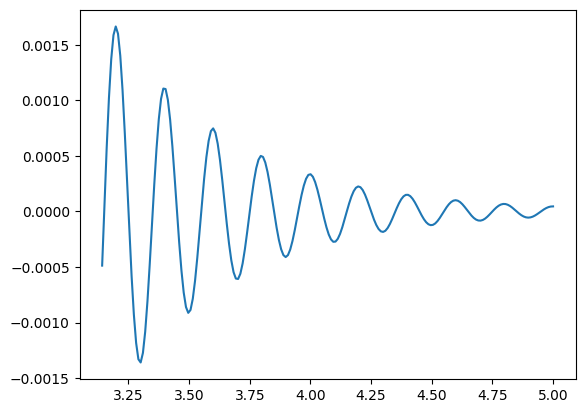

In [ ]:
 # σ < 0
t = np.linspace(np.pi,5,200)
f = 5
sigma = -2
omega = 2*np.pi*f
s = sigma + 1j*omega
y = np.exp(s*t)
plt.plot(t,y)

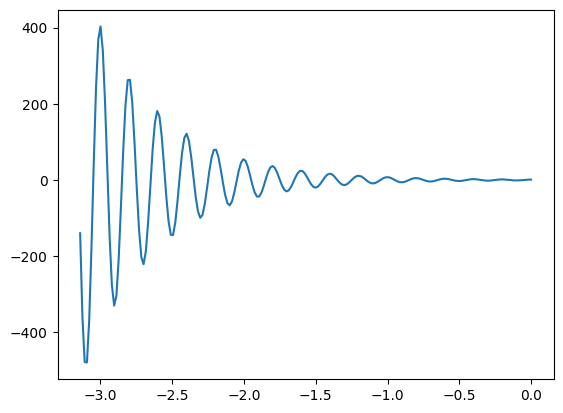

In [ ]:
 # σ < 0

t = np.linspace(-np.pi,0,200)
f = 5
sigma = -2
omega = 2*np.pi*f
s = sigma + 1j*omega
y = np.exp(s*t)
plt.plot(t,y)

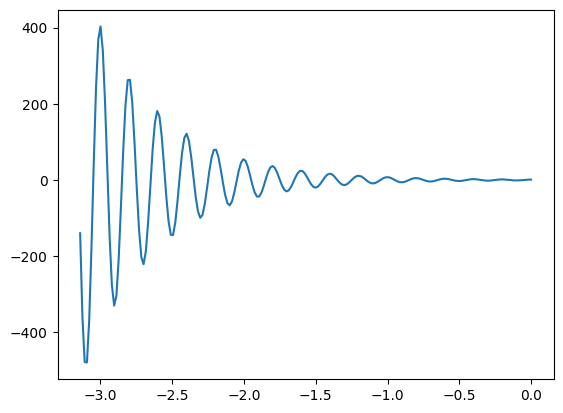

In [ ]:
 # σ < 0
t = np.linspace(-np.pi,0,200)
f = 5
sigma = -2
omega = 2*np.pi*f
s = sigma + 1j*omega
y = np.exp(s*t)
plt.plot(t,y)

Quando fazemos o intervalo de de -pi até 0, o comportamento das curvas muda, podemos notar uma "inversão" do sinal, já que teremos os mesmos valores, no entanto com o sinal contrário. Para valores além de pi, teremos um intervalo bastante diferente, então podemos notar sinais bem diferentes

>  __Exercício 3:__ É perceptível que, antes dos três gráficos acima, aparece uma mensagem de aviso, chamada de _ComplexWarning_. Explique o porque dessa mensagem e proponha uma solução para que ela não apareça.


Isso acontece porque a função plot deveria ter apenas uma dimensão, quando ela tem um array de numeros imaginários, ela descarta a parte imaginária e plota com a real. para resolver basta selecionar uma das duas partes (como feito na parte do código onde estourava esta warning.

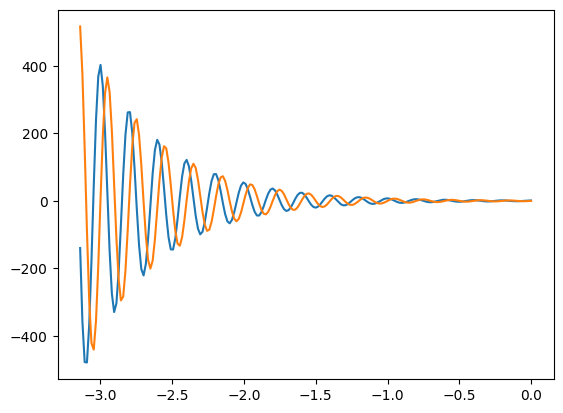

In [ ]:
plt.plot(t,np.real(y))

plt.plot(t,np.imag(y))

>  __Exercício 4:__ Obtenha os gráficos para os três casos acima, quando a função exponencial não for complexa, isto é, quando $s = \sigma$. Compare os resultados.


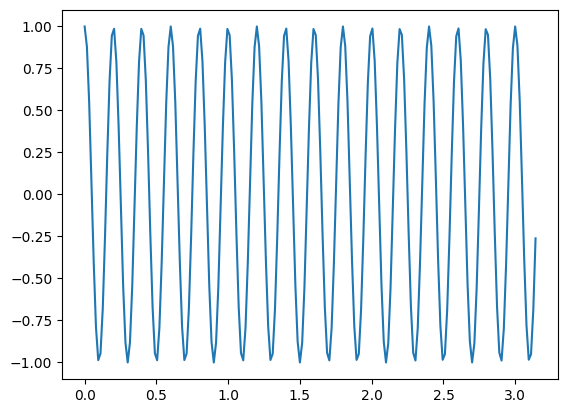

In [ ]:
# o = 0
t = np.linspace(0,np.pi,200)
f = 5
sigma = 0
omega = 2*np.pi*f
s = 1j*omega
y = np.exp(s*t)
# plt.plot(t,y)
plt.plot(t,np.real(y))


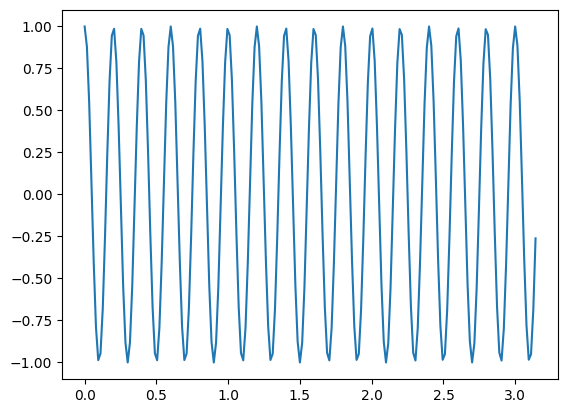

In [ ]:
# o > 0
t = np.linspace(0,np.pi,200)
f = 5
sigma = 2
omega = 2*np.pi*f
s = 1j*omega
y = np.exp(s*t)
# plt.plot(t,y)
plt.plot(t,np.real(y))


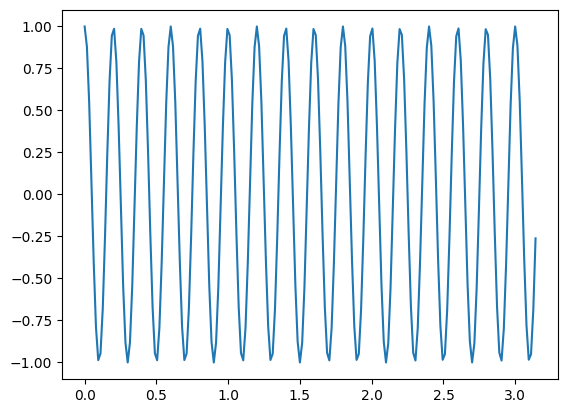

In [ ]:
# o < 0
t = np.linspace(0,np.pi,200)
f = 5
sigma = -2
omega = 2*np.pi*f
s = 1j*omega
y = np.exp(s*t)
# plt.plot(t,y)
plt.plot(t,np.real(y))


podemos notar que temos o mesmo sinal, já que estamos retirando o "o" da formula do ômega. Portanto, seu valor não interfere

>  __Exercício 5:__ Obtenha versões discretas do sinal exponencial complexo para os três casos descritos.


<StemContainer object of 3 artists>

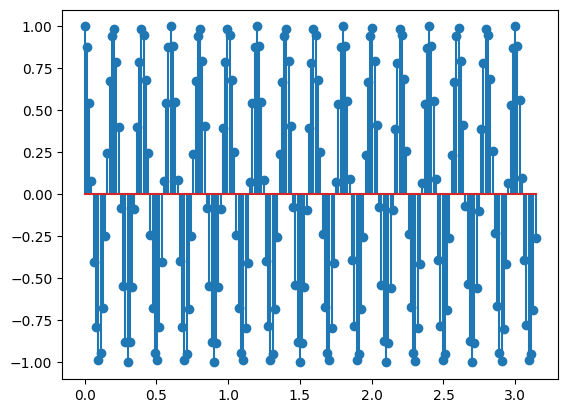

In [ ]:
# o = 0

t = np.linspace(0,np.pi,200)
f = 5
sigma = 0
omega = 2*np.pi*f
s = sigma + 1j*omega
y = np.exp(s*t)
plt.stem(t,y)

<StemContainer object of 3 artists>

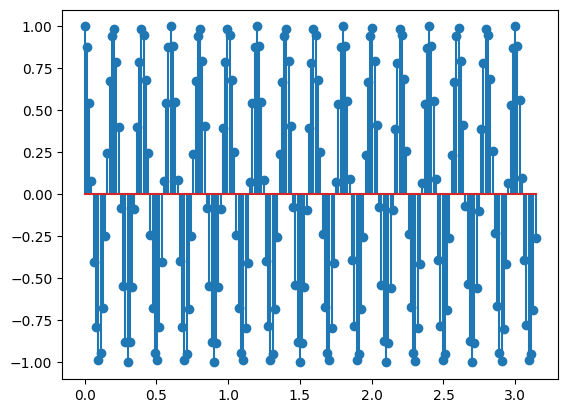

In [ ]:
# o > 0
t = np.linspace(0,np.pi,200)
f = 5
sigma = 2
omega = 2*np.pi*f
s = 1j*omega
y = np.exp(s*t)
# plt.plot(t,y)
plt.stem(t,y)


<StemContainer object of 3 artists>

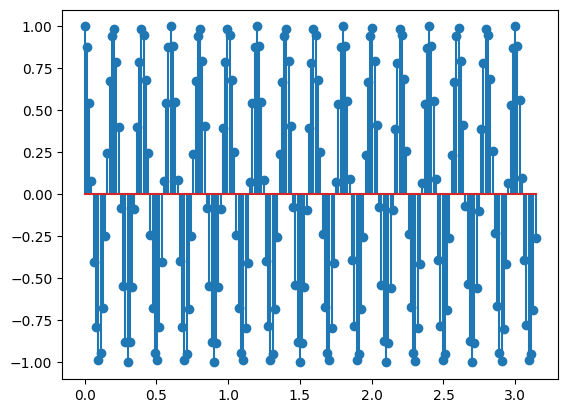

In [ ]:
# o < 0
t = np.linspace(0,np.pi,200)
f = 5
sigma = -2
omega = 2*np.pi*f
s = 1j*omega
y = np.exp(s*t)
# plt.plot(t,y)
plt.stem(t,np.real(y))



<StemContainer object of 3 artists>

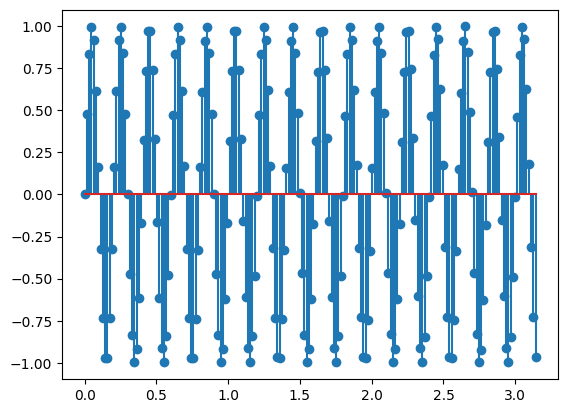

In [ ]:
plt.stem(t,np.imag(y))

#### __Função impulso unitário__

O sinal impulso unitário contínuo também é chamado de função delta ou delta de
Dirac, em alusão ao físico e matemático britânico Paul Adrien Maurice Dirac (1902-
1982), é definida como

\begin{equation}
\delta(t) =
\begin{cases}
\infty, & \text{se}~t = 0\\[2mm]
0, & \text{se}~t \neq 0,
\end{cases}
\end{equation}

com a propriedade que

\begin{equation}
\int^{\infty}_ {-\infty} \delta(t)dt = 1.
\end{equation}

Tipicamente, essa função é representada graficamente por

![](impulso.png)

em que símbolo 1 e a seta são utilizados para representar a propriedade acima.

No submódulo `signal`, da biblioteca `scipy`, existe a função `unit_impulse`, que, obrigatoriamente, precisa apenas ter um parâmetro especificado: a forma (`shape`) do sinal, que pode ser um valor, referente ao número de amostras que se deseja para a geração da função impulso, ou uma tupla, que represente a forma da saída. Além desse parâmetro, é importante a definição do parâmetro `idx`, referente ao posicionamento do impulso, que pode receber um valor, que especificará o ponto do sinal no qual estará o impulso, ou `'mid'`, que colocará o impulso no centro do sinal.

Por exemplo,

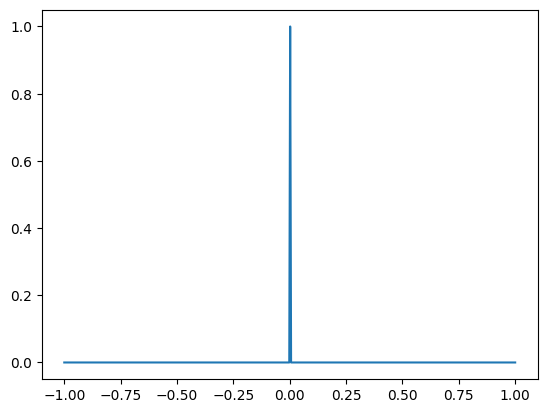

In [ ]:
t = np.linspace(-1,1,500)
y = ss.unit_impulse(len(t), idx='mid')
plt.plot(t,y)

> __Exercício 6:__ O gráfico do impulso unitário gerado pela função *unit_impulse* tem as mesmas propriedades descritas da função teórica? Justifique sua resposta.



Não, pois quando o t=0, o sinal não vai para o infinito, mas para 1

> __Exercício 7:__ Gere o gráfico com o impulso deslocado para a posição $0.5$.



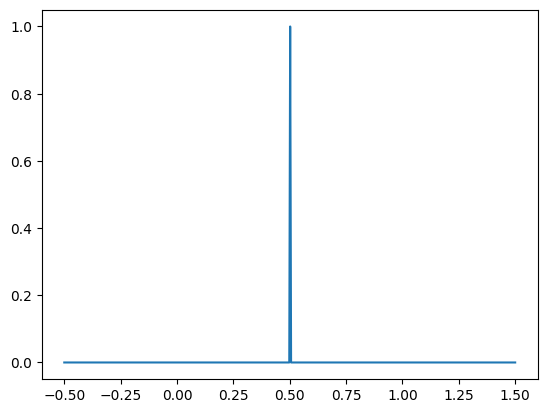

In [ ]:
t = np.linspace(-1,1,500)
t = t+0.5
y = ss.unit_impulse(len(t), idx='mid')
plt.plot(t,y)

> __Exercício 8:__ Gere o gráfico para o impulso unitário discreto.


<StemContainer object of 3 artists>

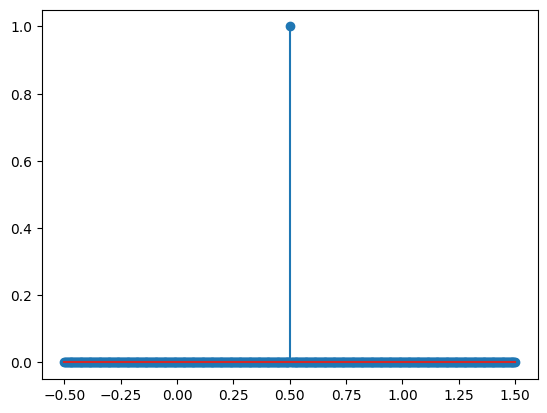

In [ ]:
t = np.linspace(-1,1,500)
t = t+0.5
y = ss.unit_impulse(len(t), idx='mid')
plt.stem(t,y)

#### __Sinal degrau unitário__

A função degrau unitário (ou Heaviside), é definida como

\begin{equation}
u(t) =  
\begin{cases}
1, & \text{se}~t > 0 \\[2mm]
0.5, & \text{se}~t = 0 \\[2mm]
0, & \text{se}~t < 0.
\end{cases}
\end{equation}

É uma função bastante importante para a caracterização de sistemas, pelo que chamamos de *resposta ao degrau* do sistema.

Também é uma função muito usada para definir outras funções muito usadas em análise de sinais. Por exemplo, a função impulso unitário, descrita na seção anterior, pode ser descrito como o limite da função degrau quando a largura do pulso tende a zero, isto é,  

\begin{equation}
\delta(t) = \lim_{\tau \rightarrow 0} u(t).
\end{equation}

A figura abaixo ilustra essa relação

![](seq_pulso.png)

Note que os sinais $x_n(t)$ (pulsos retangulares) acima são cada vez mais estreitos e mais altos, a medida que $n$ cresce, mas entretanto, eles têm todos área sob a curva igual a 1. Quando $n\rightarrow \infty$, a largura tende a 0, mas a área se mantém unitária, corroborando com as características descritas na seção anterior.

O gráfico da função degrau unitário é implementado usando a função `heaviside` da biblioteca `numpy`. Essa função possui dois parâmetros obrigatórios: o vetor de entrada $x_1$ e o valor $x_2$, que é o valor da função quando $x_1=0$, de forma que

\begin{equation}
\text{heaviside}(x_1,x_2)  =  
\begin{cases}
1, & \text{se}~x_1 > 0 \\[2mm]
x_2, & \text{se}~x_1 = 0 \\[2mm]
0, & \text{se}~x_1 < 0.
\end{cases}
\end{equation}



Vejamos um exemplo.

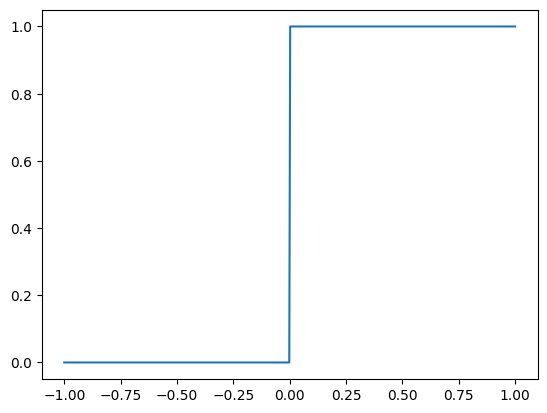

In [ ]:
t = np.linspace(-1, 1, 500)
y = np.heaviside(t,1)
plt.plot(t,y)

>  __Exercício 9:__ Gere o gráfico de um sinal degrau unitário discreto invertido com relação ao definido acima, isto é, com $u(t) = 1$, se $t < 0$.



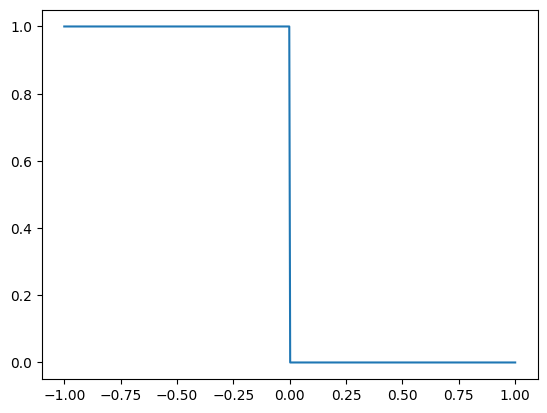

In [ ]:
t = np.linspace(-1, 1, 500)
y2 = np.heaviside(t,1)
plt.plot(t[::-1],y2)


> __Exercício 10:__ Repita o exemplo anterior, testando a função _heaviside_ para $x_2 = 0$ e a $0.5$. Existe alguma mudança no comportamento da função? E se  $x_2 < 0$ ou $x_2 >1$, alguma mudança é observada?



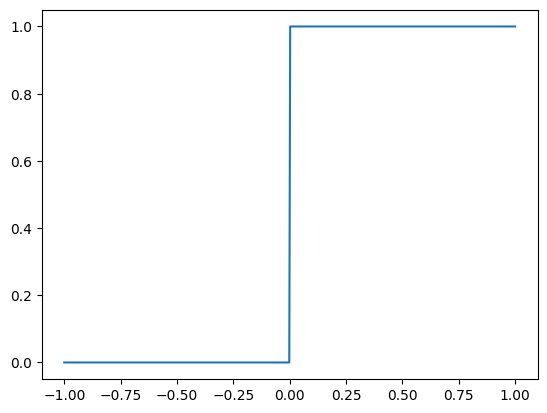

In [ ]:
t = np.linspace(-1, 1, 500)
y = np.heaviside(t,0)
plt.plot(t,y)

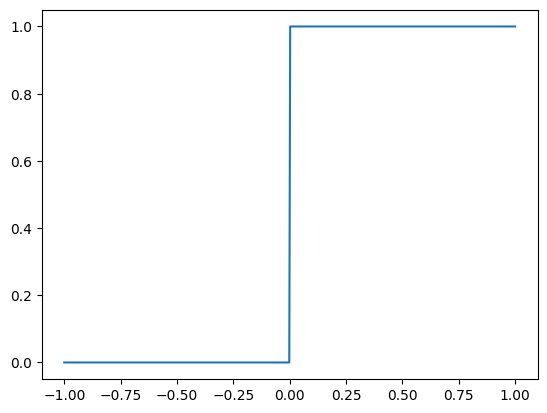

In [ ]:
t = np.linspace(-1, 1, 500)
y = np.heaviside(t,0.5)
plt.plot(t,y)

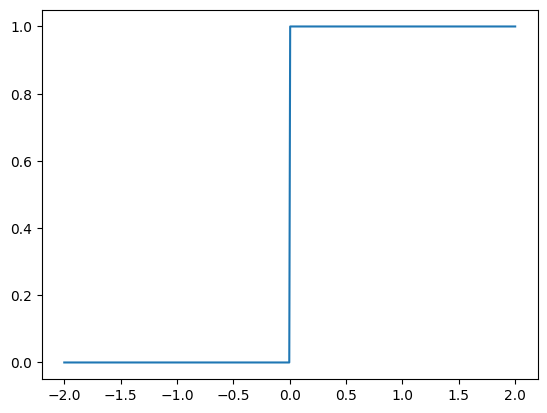

In [ ]:
t = np.linspace(-2, 2, 500)
y = np.heaviside(t,-1.5)
plt.plot(t,y)

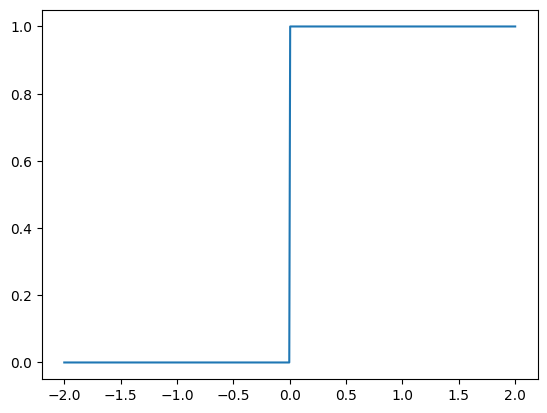

In [ ]:
t = np.linspace(-2, 2, 500)
y = np.heaviside(t,1.5)
plt.plot(t,y)

Não há mudança observada no sinal para nenhum dos casos acima

>  __Exercício 11:__ Como gerar um sinal degrau unitário que não esteja centrado em $0$? Implemente e explique sua implementação.


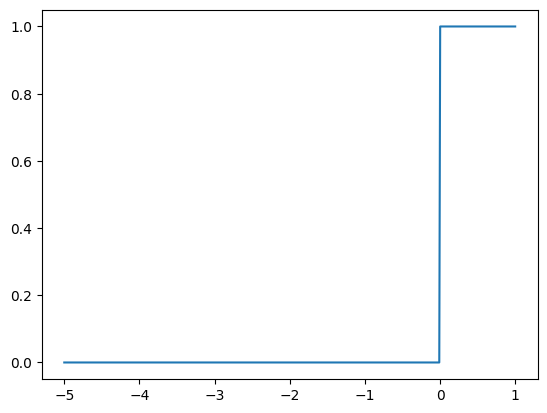

In [ ]:
t = np.linspace(-3, 3, 500)
t = t-2
y = np.heaviside(t,1)
plt.plot(t,y)

Para gerar esse sinal, diminuimos todos os tempos em dois segundos. Assim, ao invés de ir de -5 a 5, ele foi de -5 a 1, o sinal começa a levantar em 0, no entanto, nao está centrado em 0.

#### __Função sinal__

Existem alguma aplicações que podem usar uma variante do sinal degrau unitário, conhecido por função sinal, definida como

\begin{equation}
\text{sign}(t)  =  
\begin{cases}
1, & \text{se}~t > 0 \\[2mm]
0, & \text{se}~t = 0 \\[2mm]
-1, & \text{se}~t < 0.
\end{cases}
\end{equation}

Essa função possui uma implementação na biblioteca `numpy`, chamada de `sign`, cujo parâmetro fundamental é o vetor de entrada.

Vejamos um exemplo.

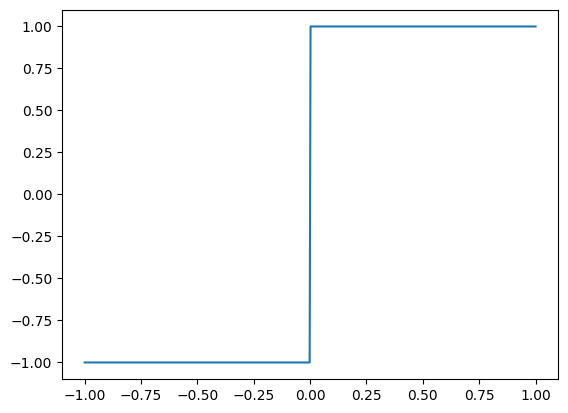

In [ ]:
t = np.linspace(-1, 1, 500)
y = np.sign(t)
plt.plot(t,y)

#### __Pulso retangular__

A função retangular (também conhecida como função porta, retângulo, rect, pi ou boxcar normalizada), que define esse tipo de sinal, é dada por

\begin{equation}
\text{rect}(t) = \prod(t) =
\begin{cases}
0, & \text{se}~|t| > \frac{\tau}{2} \\[2mm]
1, & \text{se}~|t| \leq \frac{\tau}{2},
\end{cases}
\end{equation}

em que $\tau$ define a duração do pulso retangular, isto é, o intervalo de tempo no qual a função é não-nula.

Infelizmente, não temos funções pré-definidas para esse sinal, mas sua implementação é relativamente simples, e um exemplo pode ser visto a seguir.

In [ ]:
def porta(t,tau): return 1*(np.abs(t)<=tau/2)

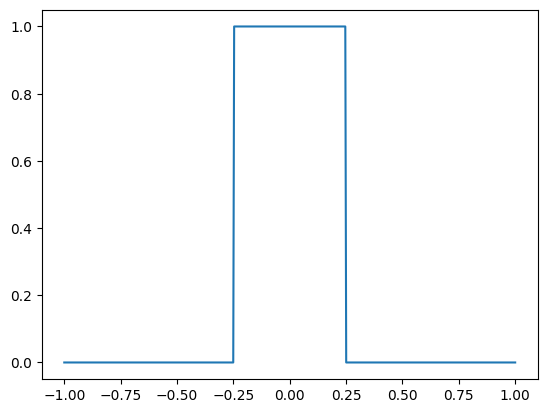

In [ ]:
def porta(t,tau): return 1*(np.abs(t)<=tau/2)
t = np.linspace(-1, 1, 500)
y = porta(t, .5)
plt.plot(t,y)

>  __Exercício 12:__ Como gerar a função sinal e o sinal retangular a partir de operações com sinais degrau unitários? Implemente e explique sua implementação.


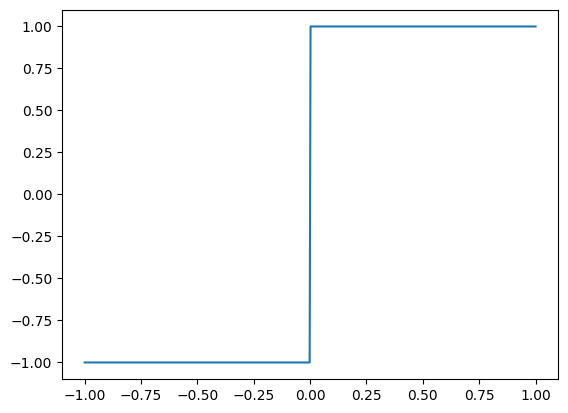

In [ ]:
# função sinal -> degrau unitário, mas de -1 a 1

t = np.linspace(-1, 1, 500)
y = np.heaviside(t,1)

f2 = []
for a in y:
  if a == 0:
    f2.append(a - 1)
  else:
    f2.append(a)
plt.plot(t,f2)

# para gerar a função sinal, o que fizemos foi transformar todos os y = 0 em y = 1

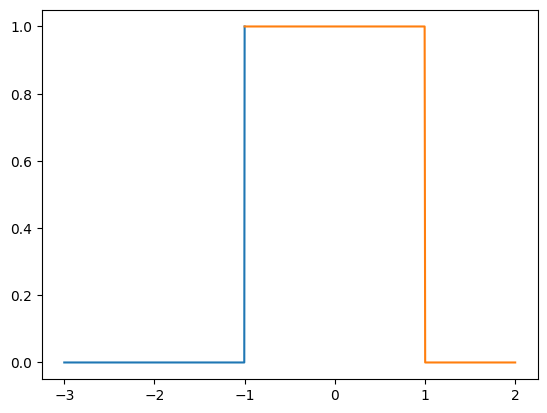

In [ ]:
# função sinal -> porta

# tenho um array que vai de -3 a -1
t1 = np.linspace(-3, -1, 500)

# faço com que eu use de -2 a 0 para calcular o haviside
# ou seja: virará 1 em 0 (que é -1)
y = np.heaviside(t1 + 1, 1)
#aqui eu ploto usando meu array de entrada de -3 a -1, mas
# com os y de (t1 + 1) -> em que a partir de -1 vira 1
plt.plot(t1,y)


# array de -1 a 2
t = np.linspace(-1, 2, 500)
# calculo meu heaviside em que vira 1 a partir de 1 (mas abaixo, faço com que em 1 seja 0)
# usando o array ao contrário
y2 = np.heaviside(t,1)
plt.plot(t[::-1],(y2))


#### __Onda quadrada__

O sinal retangular, definido na sessão acima, tipicamente é usado para definir um pulso quadrado, usado em transmissões em banda base de sistemas de comunicações, por exemplo.

Comumente, não se transmite apenas um pulso e sim um trem de pulsos, ou uma onda quadrada, que é um sinal periódico (esse é o sinal normalmente gerado em geradores de sinais eletrônicos).

O submódulo `signal`, da biblioteca `scipy`, possui uma função, chamada `square`, que gera uma onda quadrada, a partir de dois parâmetros: o vetor de entrada e o `duty`, valor referente ao ciclo de trabalho (_duty cicle_), definido como a fração de tempo em que o sinal se encontra em estado ativo, isto é, a razão entre o tempo de duração do pulso retangular ($\tau$) e o tempo total do período do sinal ($T$), ou seja,

\begin{equation}
D = \frac{\tau}{T}.
\end{equation}

Dessa forma, podemos gerar uma onda quadrada da seguinte forma

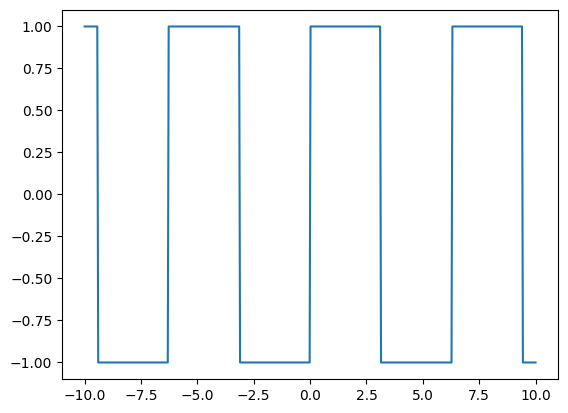

In [ ]:
t = np.linspace(-10, 10, 500)
y = ss.square(t, duty=.5)
plt.plot(t,y)

>  __Exercício 13:__ O gráfico do sinal apresentado acima é referido, no contexto de telecomunicações, como um sinal binário NRZ (sem retorno ao zero) polar, isto é, que atinge *dois pólos*: 1 e -1. Implemente uma versão unipolar desse sinal, isto é, que varia entre 0 e 1.


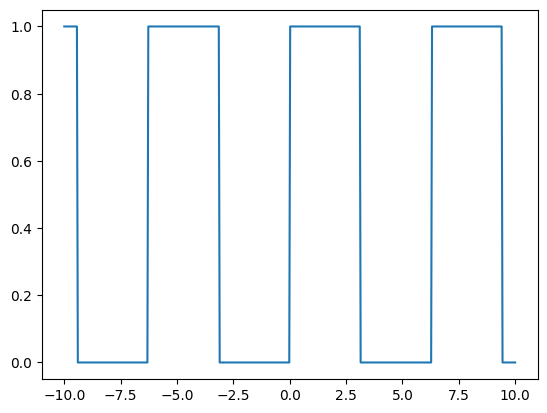

In [ ]:
t = np.linspace(-10, 10, 500)
y = ss.square(t, duty=.5)

final = []

for i in y:
  if i == -1:
    final.append(0)
  else:
    final.append(i)
plt.plot(t,final)


> __Exercício 14:__ Sinais de banda base, além do formato NRZ, podem ter o formato RZ, isto é, com retorno ao zero, como mostrado na figura abaixo. Gere o gráfico de um sinal binário banda base do tipo RZ.


> ![](RZcode.png)


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -

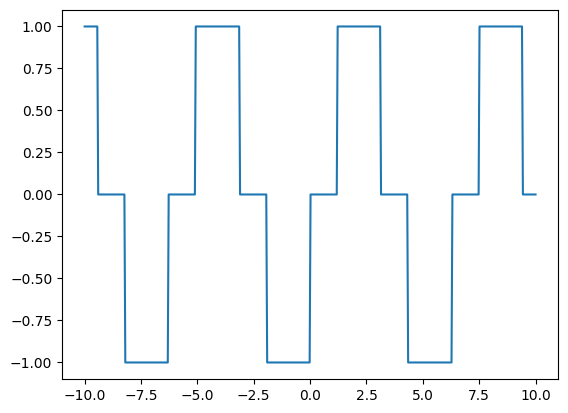

In [ ]:
t = np.linspace(-10, 10, 500)
y = ss.square(t, duty=.5)

final = []

count1 = 0
count2 = 0
teste1 = False
teste2 = False
for i in range(0, 500):

  if i == 0:
    final.append(y[i])

  elif (y[i] == -1 and y[i-1] == 1 and count1 <= 30) or (y[i-1] == 0 and count1 <= 30) or (teste1 == True):
    count1 += 1
    final.append(0)
    teste1 = True

    if count1 == 30:
      count1 = 0
      teste1 = False

  elif (y[i] == 1 and y[i-1] == -1 and count2 <= 30) or (y[i-1] == 0 and count2 <= 30)  or (teste2 == True):
    count2 += 1
    final.append(0)
    teste2= True

    if count2 == 30:
      count2 = 0
      teste2 = False

  else:
     final.append(y[i])

# print(final)
plt.plot(t,final)

#### __Pulso Triangular__

O pulso triangular é definido pela função

\begin{equation}
\text{triang}(t) = \wedge(t) =
\begin{cases}
1 - \dfrac{|t|}{\tau}, & \text{se}~|t| \leq \tau \\[2mm]
0, & \text{caso contrário},
\end{cases}
\end{equation}

em que $\tau$ é a duração do pulso.

Assim como no caso do pulso retangular, o pulso triangular também não possui uma função pré-definida, mas é de fácil implementação, como mostra o exemplo a seguir.

In [ ]:
def triang(t,tau): return (1 - np.abs(t)/tau)*(np.abs(t)<float(tau))

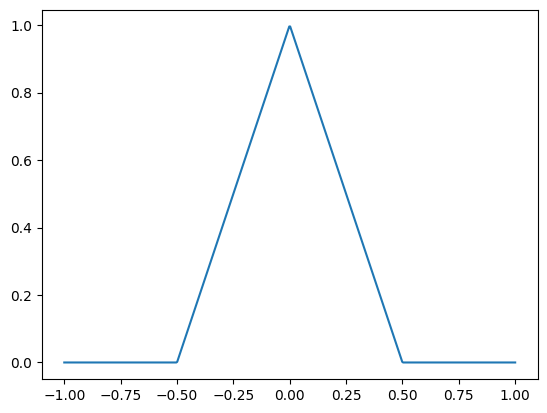

In [ ]:
t = np.linspace(-1, 1, 500)
y = triang(t, .5)
plt.plot(t,y)

> __Exercício 15:__ Gere o gráfico ilustrado pela figura abaixo. Explique sua implementação.


> ![](triangs.jpg)


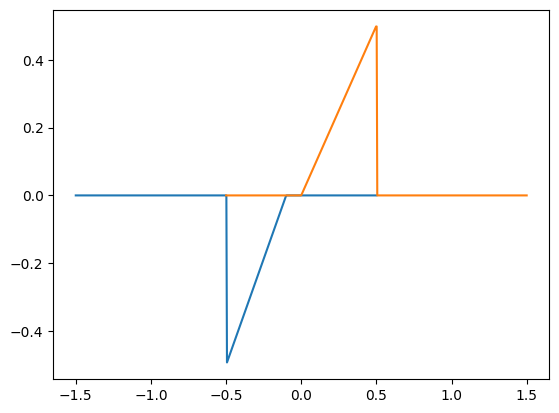

In [ ]:
t1 = np.linspace(-1, 1, 500)
y = -0.5 * triang(t, 4)
final1 = []
for i in range(0, 500):
  if i <= 250:
    final1.append(0)
  else:
    final1.append(y[i])


t2 = np.linspace(-1, 1, 500)
y2 = 0.5 * triang(t2, 0.5)



final2 = []
for i in range(0, 500):
  if i <= 250:
    final2.append(y2[i])
  else:
    final2.append(0)

plt.plot(t1-0.5,final1)
plt.plot(t2+0.5,final2)

#### __Função rampa__

A função rampa, que possui diversas aplicações em engenharia de controle, processamento de sinais, _machine learning_ e finanças, é definida como

\begin{equation}
R(x) =
\begin{cases}
x, & x \ge 0 \\[2mm]
0, & x<0 .
\end{cases}
\end{equation}

Apesar de não possuir uma função pré-implementada, pode ser facilmente implementada usando a função `maximum`, da `numpy`, que compara, elemento a elemento, dois vetores ou escalares, retornando sempre o maior dos dois valores.

Assim, podemos fazer

In [ ]:
def rampa(t): return np.maximum(0,t)

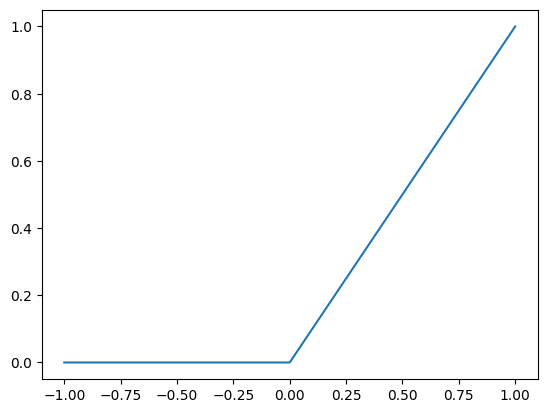

In [ ]:
t = np.linspace(-1, 1, 500)
y = rampa(t)
plt.plot(t,y)


> __Exercício 16:__ Gere o gráfico de uma função rampa a partir de um pulso triangular.



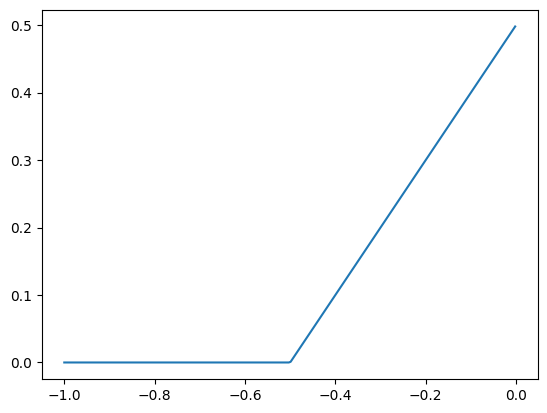

In [ ]:
t2 = np.linspace(-1, 1, 500)
y2 = 0.5 * triang(t2, 0.5)



final2 = []
for i in range(0, 500):
  if i <= 250:
    final2.append(y2[i])
  else:
    final2.append(0)

plt.plot(t2[0:250],final2[0:250])

> __Exercício 17:__ Por definição, a função rampa cresce indefinidamente para valores acima de 0. Porém, diversas aplicações usam versoes dela com limitação de amplitude. Uma das versões mais comuns é a chamada *rampa unitária*, ilustrada na figura abaixo. Implemente uma função que gere o gráfico abaixo, e explique sua implementação.


> ![](ramp.png)


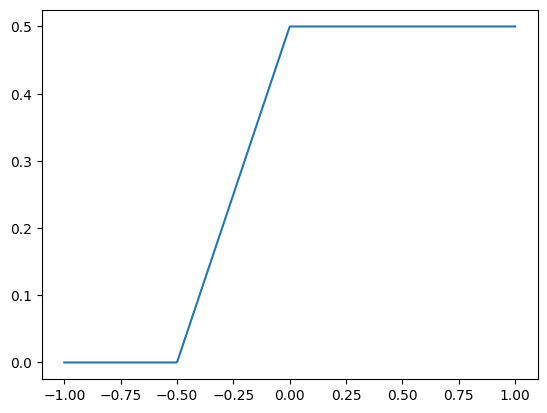

In [ ]:
t2 = np.linspace(-1, 1, 500)
y2 = 0.5 * triang(t2, 0.5)



final2 = []
for i in range(0, 500):
  if i <= 250:
    final2.append(y2[i])
  else:
    final2.append(0)

arr2 = np.full(250, 0.5)


y = np.concatenate((final2[0:250], arr2))

plt.plot(t2,y)

#### __Onda dente de serra__

A onda dente de serra é uma forma de onda também gerada pela maioria dos geradores eletrônicos de sinal, bastante utilizada em circuitos de controle, como, por exemplo, os antigos sistemas de defleção em receptores de TVs que operavam em sistema NTSC ou PAL.

Existem várias formas de definir essa função, mas uma das mais simples é usando a função

\begin{equation}
x(t) = t - \lfloor t \rfloor,
\end{equation}

em que  o operador $\lfloor \cdot \rfloor$ retorna o maior inteiro menor ou igual ao valor avaliado.

No submódulo `signal`, da biblioteca `scipy`, existe a função `sawtooth`, que gera uma onda dente de serra, a partir de dois parâmetros: o vetor de entrada e o `width`, equivalente ao ciclo de trabalho (_duty cicle_), referente à proporção entre o tempo de subida da rampa e o ciclo total do sinal.

Assim, para gerar uma onda dente de serra, podemos usar

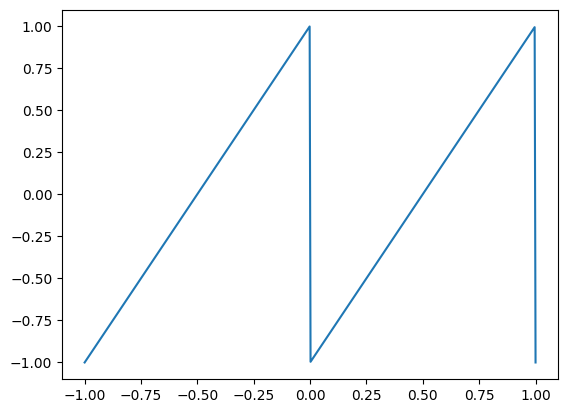

In [ ]:
t = np.linspace(-1, 1, 500)
y = ss.sawtooth(2 * np.pi * 1 * t)
plt.plot(t,y)

#### __Função Sinc__

A função sinc, termo que é uma contração do nome da função em latim _sinus cardinalis_ (seno cardinal), denotada por $\text{sinc}(x)$ e às vezes como $\text{Sa}(x)$, tem duas definições praticamente equivalentes. Em matemática, a _função sinc não-normalizada_ historicamente é definida por

\begin{equation}
\operatorname{sinc}(x) = \dfrac{\sin(x)}{x}.
\end{equation}


Na teoria de processamento de sinais, a _função sinc normalizada_ é comumente definida por

\begin{equation}
\operatorname{sinc}(x) = \dfrac{\sin(\pi x)}{\pi x}.
\end{equation}

Ela é dita normalizada porque a sua integral sobre todos os $x$ é 1. Esta função é fundamental no conceito de reconstrução de sinais originais contínuos limitados em banda, tipico caso real de sinais em sistemas de comunicações.

A única diferença entre as duas definições está na escala da variável independente por um fator de $\pi$. Em ambos os casos, o valor da função na singularidade em zero é entendido como o valor limite 1.

A biblioteca `numpy` possui uma função, denominada `sinc`, que implementa a versão normalizada.

Assim, para geração do gráfico,

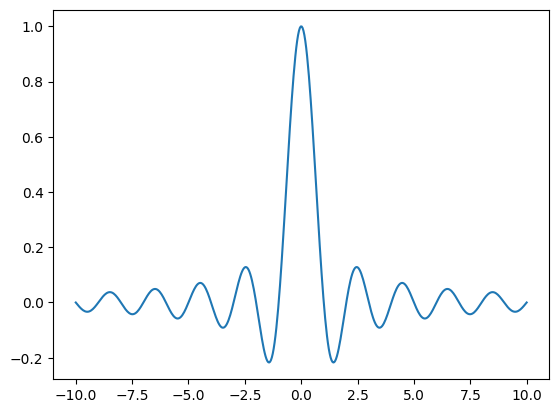

In [ ]:
t = np.linspace(-10, 10, 500)
y = np.sinc(t)
plt.plot(t,y)

>  __Exercício 18:__ Gere o gráfico que mostra o resultado do produto entre uma função sinc e um pulso retangular. Explique o resultado.


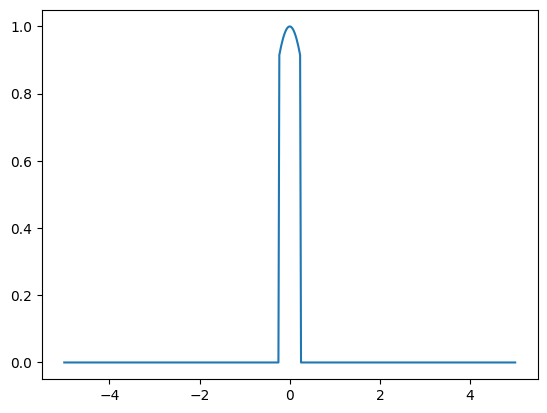

In [ ]:
t = np.linspace(-5, 5, 500)
sinc_func = np.sinc(t)

def porta(t,tau): return 1*(np.abs(t)<=tau/2)
t = np.linspace(-5, 5, 500)
retangular = porta(t, .5)

resultado = sinc_func * retangular


plt.plot(t, resultado)

# como os pontos "fora da porta" são 0, então eles continuam como 0,
# a parte do meio toma a forma da função sinc